# Data Preparation and Analysis
## Preparation:

In [1]:
import os
path = 'chest_xray'
dirs = os.listdir(path)
train_dir = path + '/train/'
test_dir = path + '/test/'
val_dir = path + '/val/'
train_dirs = os.listdir(train_dir)
norm_train = train_dir + 'NORMAL/'
pnem_train   = train_dir + 'PNEUMONIA/'

In [2]:
from glob import glob
norm_imgs = glob(norm_train + "*.jpeg")
pnem_imgs = glob(pnem_train + "*.jpeg")

In [3]:
import numpy as np
import matplotlib.pyplot as plot

def display_images(image_count):
    
    for img in range(image_count):
        pnem_img   = np.asarray(plot.imread(pnem_imgs[img]))
        norm_img = np.asarray(plot.imread(norm_imgs[img]))

        fig = plot.figure(figsize= (15,15))
        
        pneu_plot = fig.add_subplot(1, 2, 1)
        #plot.imshow(pnem_img, cmap='bone')
        plot.imshow(pnem_img, cmap='gray')
        pneu_plot.set_title('Pneumonia')
        plot.axis('off')
        
        normal_plot = fig.add_subplot(1,2,2)
        plot.imshow(norm_img, cmap='gray')
        normal_plot.set_title('Normal')
        plot.axis('off')
    
        plot.show()

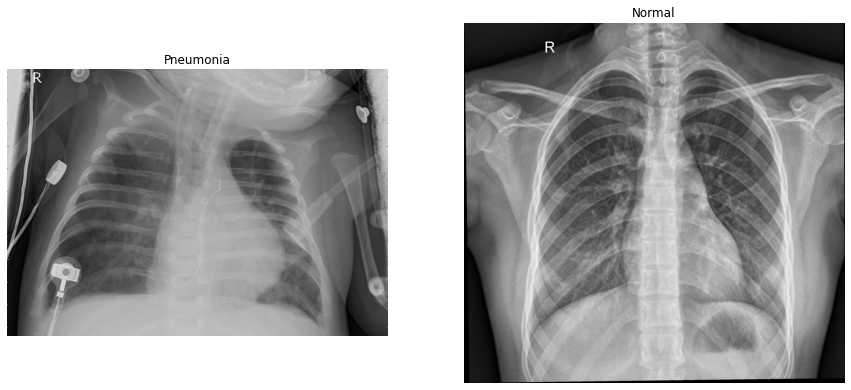

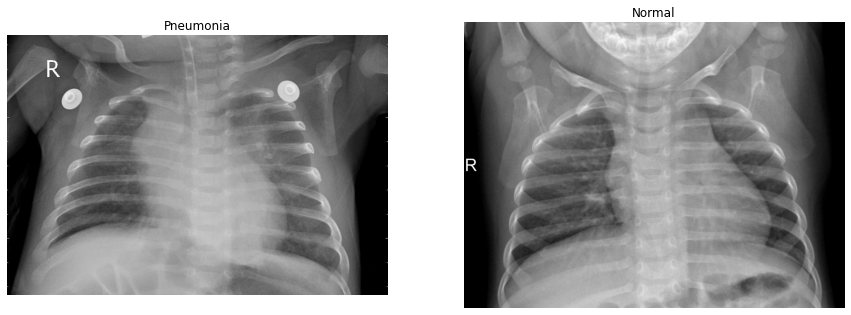

In [4]:
display_images(2)

`ImageDataGenerator()` class from `Keras` is used here for **data augmentation**, or **image processing**, which helps in expanding the training dataset. As more training data is always considered better, it might lead to overfitting but as the model has to generalize more, this seems to become less of a problem.

**Steps:**
- **Rescaling Data**: I rescaled the data as most images have RGB values ranging from 0-255, which are a little too high for the models to handle. Hence by dividing these values by 255, i.e. multiplying these values by `1/255`, each RGB value can be condensed to a value between 0-1, which is easier for the model to process.
- **Zooming**: For randomly zooming on the images, `zoom_range` to '0.25', which is a random choice in this case.
- **Shear Mapping**: `shear_range` will randomly apply shear transformations, or mapping to the data, the range will be `0.2` in our case, based on a refrence from this wikipedia [article](https://en.wikipedia.org/wiki/Shear_mapping).
- **Flipping**: As I chose to randomly flip half of the images, this has been set to `True`.
- **Translation**: Responsible for random translation of images.
    - **Height**: `height_shift_range` is used for random height translation
    - **Weight**: `widht_shift_range` is used for random width translation
- **Rotation**: The value in degrees for which the images can be randomly rotated is set in `rotation_range`.

The test set will be rescaled aswell, as it does not need all of the same transformations applied to the training data.

This has been done as test set/data can't be manipulated to avoid overfitting as the training data does.

The test set has to be the original images inorder to accurately predict pneumonia in real world,life. So the manipulation must be kept minimal or none if possible.

In [10]:
from keras.preprocessing.image import ImageDataGenerator

train_data_gen = ImageDataGenerator(rescale            = 1/255,
                                    zoom_range         = 0.25,
                                    shear_range        = 0.2,
                                    horizontal_flip    = True,
                                    width_shift_range  = 0.25,
                                    height_shift_range = 0.25,
                                    rotation_range     = 45)

test_data_gen = ImageDataGenerator(rescale = 1/255)

**Generating brances of augmented data**: This can be done by passing paths of our folders into `flow_from_directory()` from `Keras`.

- **Arguments**:
    - 1.  directory to fetch from.
    - 2. `target size` is used to set the dimensions of the images after they are resized.
    - 3. `batch_size` used to set the size of individual batches.
    - 4. `class_mode` is set to `'binary'` to return 1D binary labels.

In [7]:
training_set = train_data_gen.flow_from_directory(train_dir,
                                   target_size= (64, 64),
                                   batch_size = 32,
                                   class_mode = 'binary')

Found 5216 images belonging to 2 classes.


In [8]:
validation_set = test_data_gen.flow_from_directory(val_dir,
                                   target_size=(64, 64),
                                   batch_size = 32,
                                   class_mode ='binary')

Found 16 images belonging to 2 classes.


In [9]:
test_set = test_data_gen.flow_from_directory(test_dir,
                                   target_size= (64, 64),
                                   batch_size = 32,
                                   class_mode = 'binary')

Found 624 images belonging to 2 classes.
